# Population Models

This notebook demonstrates how to work with population models. See `xforms Demo` for details on xforms.

In [1]:
from pathlib import Path

import nems.uri
import nems.xforms as xforms
import nems.recording as recording

[nems.configs.defaults INFO] Saving log messages to /tmp/nems\NEMS 2020-05-29 110208.log


## Configuration

In [2]:
# get the data and results paths
results_dir = nems.get_setting('NEMS_RESULTS_DIR')
signals_dir = nems.get_setting('NEMS_RECORDINGS_DIR')

In [3]:
# download some demo data
recording.get_demo_recordings(signals_dir, 'TAR010c.NAT.fs100.tgz')
datafile = Path(signals_dir) / 'TAR010c.NAT.fs100.tgz'

## Data Loading and Preprocessing

In [4]:
load_command = 'nems.demo.loaders.demo_loader'
exptid = 'TAR010c'
batch = 271
siteid = 'TAR010c'

In pop models, you can specify a variable number of outputs using `R`, and the model will determine the proper number of output channels.

In [5]:
modelspec_name = 'dlog-wc.18x3.g-fir.1x10x3-relu.3-wc.3xR-lvl.R'

## Generate the Modelspec

In [6]:
meta = {'siteid': siteid, 'batch': batch, 'modelname': modelspec_name,
        'recording': exptid}

xforms_init_context = {'siteid': siteid, 'batch': int(batch)}
xforms_init_context['keywordstring'] = modelspec_name
xforms_init_context['meta'] = meta
xforms_init_context['recording_uri_list'] = [str(datafile)]

In [7]:
xfspec = []

In [8]:
xfspec.append(['nems.xforms.init_context', xforms_init_context])
xfspec.append(['nems.xforms.load_recordings', {}])
xfspec.append(['nems.preprocessing.resp_to_pc',
              {'pc_source': 'psth', 'overwrite_resp': False,
               'pc_count': 2}])
xfspec.append(['nems.xforms.split_by_occurrence_counts',
               {'epoch_regex': '^STIM_'}])
xfspec.append(['nems.xforms.average_away_stim_occurrences', {}])

xfspec.append(['nems.xforms.init_from_keywords', {}])

In [9]:
xfspec.append(['nems.analysis.fit_pop_model.init_pop_pca', {'flip_pcs': True}])

xfspec.append(['nems.analysis.fit_pop_model.fit_population_iteratively',
               {'fitter': 'scipy_minimize', 'tolerances': [1e-4, 3e-5],
                'tol_iter': 50, 'fit_iter': 10}])

In [10]:
xfspec.append(['nems.xforms.predict', {}])
xfspec.append(['nems.analysis.api.standard_correlation', {},
               ['est', 'val', 'modelspec', 'rec'], ['modelspec']])
xfspec.append(['nems.xforms.plot_summary', {}])

## Run the Analysis

[nems.xforms INFO] Evaluating: nems.xforms.init_context
[nems.xforms INFO] Evaluating: nems.xforms.load_recordings
[nems.xforms INFO] Extracting cellid(s) None
[nems.preprocessing INFO] Adding to epoch_onsets: TRIAL with shift = 0
[nems.xforms INFO] Evaluating: nems.preprocessing.resp_to_pc
[nems.preprocessing INFO] generating PSTHs for 93 epochs
[nems.xforms INFO] Evaluating: nems.xforms.split_by_occurrence_counts
[nems.xforms INFO] Evaluating: nems.xforms.average_away_stim_occurrences
[nems.xforms INFO] Evaluating: nems.xforms.init_from_keywords
[nems.initializers INFO] kw: dlog
[nems.initializers INFO] kw: wc.18x3.g
[nems.initializers INFO] kw: fir.1x10x3
[nems.initializers INFO] kw: relu.3
[nems.initializers INFO] kw: dynamically subbing wc.3xR with wc.3x55
[nems.initializers INFO] kw: dynamically subbing lvl.R with lvl.55
[nems.initializers INFO] Setting modelspec[0] input to stim
[nems.utils INFO] model save destination: C:\Users\Alex\PycharmProjects\NEMS\results\271\TAR010c\TAR0

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.analysis.cost_functions INFO] Eval #100. E=0.712659
[nems.analysis.cost_functions INFO] Eval #200. E=0.669269
[nems.analysis.cost_functions INFO] Eval #300. E=0.658241
[nems.analysis.cost_functions INFO] Eval #400. E=0.656082
[nems.fitters.fitter INFO] Starting error: 0.980655 -- Final error: 0.655754
[nems.fitters.fitter INFO] Final sigma: [-0.667   0.2013  0.0837  0.0357  0.484   0.2673 -0.0306 -0.0555  0.0311
  0.0262  0.0095 -0.0446 -0.1568 -0.5761]
[nems.analysis.fit_basic INFO] Delta error: 0.980655 - 0.655754 = -3.249008e-01
[nems.analysis.fit_pop_model INFO] Initializing filter 1
[nems.analysis.fit_pop_model INFO] Temporarily converting relu to lvl
[nems.initializers INFO] prefit_LN parameters: tol=1.00e-04 max_iter=700
[nems.initializers INFO] target_module: ['levelshift', 'relu'] found at modelspec[3].
[nems.initializers INFO] Mod 3 (nems.modules.levelshift.levelshift) initializing level to resp mean 0.000
[nems.initializers INFO] resp has 1 channels
[nems.initializers 

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.analysis.cost_functions INFO] Eval #100. E=0.951017
[nems.analysis.cost_functions INFO] Eval #200. E=0.942893
[nems.fitters.fitter INFO] Starting error: 0.996649 -- Final error: 0.942228
[nems.fitters.fitter INFO] Final sigma: [ 0.2898  0.3081 -0.2259  0.2664  0.7422  0.1107 -0.2714 -0.2229 -0.0619
  0.0158 -0.0107 -0.3364 -0.0068]
[nems.analysis.fit_basic INFO] Delta error: 0.996649 - 0.942228 = -5.442093e-02
[nems.analysis.fit_pop_model INFO] First fit per cell slice 0
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.analysis.fit_basic INFO] Data len pre-mask: 49500
[nems.analysis.fit_basic INFO] Data len post-mask: 49500
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.fitters.fitter INFO] options {'ftol': 0.0001, 'maxiter': 20, 'maxfun': 200}
[nems.fitters.fitter INFO] Start sigma: [0.01 0.01 0.01 0.  ]
[nems.fitters.fitter INFO] Starting error: 1.284894 -- Final error: 0.983365
[nems.fitters.fitter INFO] Final sigma: [ 0.0778 -0.0463 -0.0861  0.2073]
[nems.an

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=0
[nems.fitters.fitter INFO] options {'ftol': 0.0001, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [-0.667   0.2013  0.0837  0.0357  0.484   0.2673 -0.0306 -0.0555  0.0311
  0.0262  0.0095 -0.0446 -0.1568  0.5761]
[nems.fitters.fitter INFO] Starting error: 0.876768 -- Final error: 0.876471
[nems.fitters.fitter INFO] Final sigma: [-0.6655  0.1613  0.0883  0.0317  0.4811  0.2674 -0.0279 -0.0523  0.0333
  0.0268  0.0091 -0.0457 -0.1584  0.577 ]
[nems.analysis.fit_basic INFO] Delta error: 0.876768 - 0.876471 = -2.969923e-04
[nems.analysis.fit_pop_model INFO] Updating dim 2/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 0.0001, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.2013  0.0837 -0.0357 -0.484  -0.2673  0.0306  0.0555 -0.0311 -0.0262
 -0.0095  0.0446  0.1568 -0.5761]
[nems.fitters.fitter INFO] Starting error: 0.876470 -- Final error: 0.875554
[nems.fitters.fitter INFO] Final sigma: [ 0.1874  0.1226  0.0021 -0.4559 -0.2484  0.0324  0.0425 -0.0536 -0.0572
 -0.0494 -0.0068  0.099  -0.6237]
[nems.analysis.fit_basic INFO] Delta error: 0.876470 - 0.875554 = -9.168420e-04
[nems.analysis.fit_pop_model INFO] Updating dim 3/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 0.0001, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.2898  0.3081 -0.2259  0.2664  0.7422  0.1107 -0.2714 -0.2229 -0.0619
  0.0158 -0.0107 -0.3364  0.0068]
[nems.fitters.fitter INFO] Starting error: 0.875554 -- Final error: 0.875501
[nems.fitters.fitter INFO] Final sigma: [ 0.2926  0.3091 -0.2221  0.2687  0.7415  0.1078 -0.2734 -0.2245 -0.0632
  0.0155 -0.0095 -0.334   0.0062]
[nems.analysis.fit_basic INFO] Delta error: 0.875554 - 0.875501 = -5.261637e-05
[nems.analysis.fit_pop_model INFO] Slice 0 set [4, 5]
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.fitters.fitter INFO] options {'ftol': 0.0001, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.0778 -0.0463 -0.0861  0.2073]
[nems.fitters.fitter INFO] Starting error: 0.982323 -- Final error: 0.982259
[nems.fitters.fitter INFO] 

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=0
[nems.fitters.fitter INFO] options {'ftol': 0.0001, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [-0.6655  0.1613  0.0883  0.0317  0.4811  0.2674 -0.0279 -0.0523  0.0333
  0.0268  0.0091 -0.0457 -0.1584  0.577 ]
[nems.fitters.fitter INFO] Starting error: 0.875026 -- Final error: 0.875020
[nems.fitters.fitter INFO] Final sigma: [-0.6658  0.1622  0.0863  0.0314  0.4811  0.2683 -0.0264 -0.0508  0.0342
  0.027   0.009  -0.0461 -0.159   0.5765]
[nems.analysis.fit_basic INFO] Delta error: 0.875026 - 0.875020 = -5.478445e-06
[nems.analysis.fit_pop_model INFO] Updating dim 2/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 0.0001, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.1874  0.1226  0.0021 -0.4559 -0.2484  0.0324  0.0425 -0.0536 -0.0572
 -0.0494 -0.0068  0.099  -0.6237]
[nems.fitters.fitter INFO] Starting error: 0.875021 -- Final error: 0.875002
[nems.fitters.fitter INFO] Final sigma: [ 0.1873  0.1236  0.0036 -0.4548 -0.2475  0.0325  0.042  -0.0545 -0.0584
 -0.0509 -0.0086  0.0969 -0.6252]
[nems.analysis.fit_basic INFO] Delta error: 0.875021 - 0.875002 = -1.885592e-05
[nems.analysis.fit_pop_model INFO] Updating dim 3/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 0.0001, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.2926  0.3091 -0.2221  0.2687  0.7415  0.1078 -0.2734 -0.2245 -0.0632
  0.0155 -0.0095 -0.334   0.0062]
[nems.fitters.fitter INFO] Starting error: 0.875002 -- Final error: 0.874970
[nems.fitters.fitter INFO] Final sigma: [ 0.2948  0.3093 -0.2169  0.2725  0.7423  0.1062 -0.2744 -0.2253 -0.0637
  0.0158 -0.0078 -0.3312  0.0057]
[nems.analysis.fit_basic INFO] Delta error: 0.875002 - 0.874970 = -3.208294e-05
[nems.analysis.fit_pop_model INFO] Slice 0 set [4, 5]
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.fitters.fitter INFO] options {'ftol': 0.0001, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.0793 -0.0489 -0.0846  0.2107]
[nems.fitters.fitter INFO] Starting error: 0.982188 -- Final error: 0.982142
[nems.fitters.fitter INFO] 

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=0
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [-0.6658  0.1622  0.0863  0.0314  0.4811  0.2683 -0.0264 -0.0508  0.0342
  0.027   0.009  -0.0461 -0.159   0.5765]
[nems.fitters.fitter INFO] Starting error: 0.874935 -- Final error: 0.874931
[nems.fitters.fitter INFO] Final sigma: [-0.666   0.1625  0.086   0.0316  0.4814  0.2687 -0.0259 -0.0503  0.0347
  0.0273  0.0091 -0.0459 -0.1589  0.5763]
[nems.analysis.fit_basic INFO] Delta error: 0.874935 - 0.874931 = -3.136176e-06
[nems.analysis.fit_pop_model INFO] Updating dim 2/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.1873  0.1236  0.0036 -0.4548 -0.2475  0.0325  0.042  -0.0545 -0.0584
 -0.0509 -0.0086  0.0969 -0.6252]
[nems.fitters.fitter INFO] Starting error: 0.874932 -- Final error: 0.874916
[nems.fitters.fitter INFO] Final sigma: [ 0.1873  0.1244  0.005  -0.4536 -0.2467  0.0326  0.0415 -0.0553 -0.0594
 -0.0522 -0.0103  0.0949 -0.626 ]
[nems.analysis.fit_basic INFO] Delta error: 0.874932 - 0.874916 = -1.548228e-05
[nems.analysis.fit_pop_model INFO] Updating dim 3/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.2948  0.3093 -0.2169  0.2725  0.7423  0.1062 -0.2744 -0.2253 -0.0637
  0.0158 -0.0078 -0.3312  0.0057]
[nems.fitters.fitter INFO] Starting error: 0.874916 -- Final error: 0.874904
[nems.fitters.fitter INFO] Final sigma: [ 0.2968  0.3095 -0.2145  0.2733  0.7402  0.1019 -0.2779 -0.2286 -0.0667
  0.0137 -0.0085 -0.3307  0.0065]
[nems.analysis.fit_basic INFO] Delta error: 0.874916 - 0.874904 = -1.217468e-05
[nems.analysis.fit_pop_model INFO] Slice 0 set [4, 5]
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.0778 -0.0517 -0.0841  0.2085]
[nems.fitters.fitter INFO] Starting error: 0.982188 -- Final error: 0.981897
[nems.fitters.fitter INFO] Fi

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu



[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [-0.666   0.1625  0.086   0.0316  0.4814  0.2687 -0.0259 -0.0503  0.0347
  0.0273  0.0091 -0.0459 -0.1589  0.5763]
[nems.fitters.fitter INFO] Starting error: 0.874809 -- Final error: 0.874807
[nems.fitters.fitter INFO] Final sigma: [-0.6661  0.1625  0.0855  0.0316  0.4815  0.269  -0.0254 -0.0497  0.0351
  0.0275  0.0093 -0.0458 -0.1588  0.5761]
[nems.analysis.fit_basic INFO] Delta error: 0.874809 - 0.874807 = -2.285396e-06
[nems.analysis.fit_pop_model INFO] Updating dim 2/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.1873  0.1244  0.005  -0.4536 -0.2467  0.0326  0.0415 -0.0553 -0.0594
 -0.0522 -0.0103  0.0949 -0.626 ]
[nems.fitters.fitter INFO] Starting error: 0.874807 -- Final error: 0.874790
[nems.fitters.fitter INFO] Final sigma: [ 0.1874  0.1253  0.0064 -0.4526 -0.2459  0.0327  0.0408 -0.0563 -0.0607
 -0.0537 -0.0121  0.0928 -0.627 ]
[nems.analysis.fit_basic INFO] Delta error: 0.874807 - 0.874790 = -1.690195e-05
[nems.analysis.fit_pop_model INFO] Updating dim 3/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.2968  0.3095 -0.2145  0.2733  0.7402  0.1019 -0.2779 -0.2286 -0.0667
  0.0137 -0.0085 -0.3307  0.0065]
[nems.fitters.fitter INFO] Starting error: 0.874790 -- Final error: 0.874767
[nems.fitters.fitter INFO] Final sigma: [ 0.2987  0.3096 -0.2093  0.2772  0.7414  0.1007 -0.2785 -0.229  -0.0669
  0.0142 -0.0066 -0.3279  0.0059]
[nems.analysis.fit_basic INFO] Delta error: 0.874790 - 0.874767 = -2.341867e-05
[nems.analysis.fit_pop_model INFO] Slice 0 set [4, 5]
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.0653 -0.0735 -0.0757  0.2201]
[nems.fitters.fitter INFO] Starting error: 0.981803 -- Final error: 0.981801
[nems.fitters.fitter INFO] Fi

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=0
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [-0.6661  0.1625  0.0855  0.0316  0.4815  0.269  -0.0254 -0.0497  0.0351
  0.0275  0.0093 -0.0458 -0.1588  0.5761]
[nems.fitters.fitter INFO] Starting error: 0.874738 -- Final error: 0.874736
[nems.fitters.fitter INFO] Final sigma: [-0.6662  0.1626  0.0851  0.0316  0.4816  0.2693 -0.0249 -0.0492  0.0355
  0.0277  0.0094 -0.0457 -0.1587  0.5759]
[nems.analysis.fit_basic INFO] Delta error: 0.874738 - 0.874736 = -1.875531e-06
[nems.analysis.fit_pop_model INFO] Updating dim 2/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.1874  0.1253  0.0064 -0.4526 -0.2459  0.0327  0.0408 -0.0563 -0.0607
 -0.0537 -0.0121  0.0928 -0.627 ]
[nems.fitters.fitter INFO] Starting error: 0.874736 -- Final error: 0.874723
[nems.fitters.fitter INFO] Final sigma: [ 0.1874  0.1261  0.0078 -0.4515 -0.2451  0.0328  0.0404 -0.0571 -0.0617
 -0.0549 -0.0137  0.0909 -0.6278]
[nems.analysis.fit_basic INFO] Delta error: 0.874736 - 0.874723 = -1.356537e-05
[nems.analysis.fit_pop_model INFO] Updating dim 3/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.2987  0.3096 -0.2093  0.2772  0.7414  0.1007 -0.2785 -0.229  -0.0669
  0.0142 -0.0066 -0.3279  0.0059]
[nems.fitters.fitter INFO] Starting error: 0.874723 -- Final error: 0.874699
[nems.fitters.fitter INFO] Final sigma: [ 0.3005  0.3096 -0.2066  0.2785  0.7399  0.0971 -0.2813 -0.2316 -0.0694
  0.0126 -0.007  -0.3271  0.0066]
[nems.analysis.fit_basic INFO] Delta error: 0.874723 - 0.874699 = -2.409103e-05
[nems.analysis.fit_pop_model INFO] Slice 0 set [4, 5]
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.0658 -0.0735 -0.0757  0.2206]
[nems.fitters.fitter INFO] Starting error: 0.981847 -- Final error: 0.981842
[nems.fitters.fitter INFO] Fi

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [-0.6662  0.1626  0.0851  0.0316  0.4816  0.2693 -0.0249 -0.0492  0.0355
  0.0277  0.0094 -0.0457 -0.1587  0.5759]
[nems.fitters.fitter INFO] Starting error: 0.874675 -- Final error: 0.874673
[nems.fitters.fitter INFO] Final sigma: [-0.6663  0.1627  0.0846  0.0316  0.4817  0.2696 -0.0243 -0.0486  0.0359
  0.0279  0.0095 -0.0456 -0.1587  0.5757]
[nems.analysis.fit_basic INFO] Delta error: 0.874675 - 0.874673 = -1.857823e-06
[nems.analysis.fit_pop_model INFO] Updating dim 2/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.1874  0.1261  0.0078 -0.4515 -0.2451  0.0328  0.0404 -0.0571 -0.0617
 -0.0549 -0.0137  0.0909 -0.6278]
[nems.fitters.fitter INFO] Starting error: 0.874673 -- Final error: 0.874661
[nems.fitters.fitter INFO] Final sigma: [ 0.1873  0.1267  0.0092 -0.4503 -0.2442  0.0331  0.04   -0.0577 -0.0625
 -0.0559 -0.015   0.0894 -0.629 ]
[nems.analysis.fit_basic INFO] Delta error: 0.874673 - 0.874661 = -1.174537e-05
[nems.analysis.fit_pop_model INFO] Updating dim 3/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.3005  0.3096 -0.2066  0.2785  0.7399  0.0971 -0.2813 -0.2316 -0.0694
  0.0126 -0.007  -0.3271  0.0066]
[nems.fitters.fitter INFO] Starting error: 0.874661 -- Final error: 0.874633
[nems.fitters.fitter INFO] Final sigma: [ 0.3023  0.3095 -0.2021  0.2817  0.7405  0.0956 -0.2822 -0.2324 -0.0699
  0.0128 -0.0055 -0.3247  0.0064]
[nems.analysis.fit_basic INFO] Delta error: 0.874661 - 0.874633 = -2.825998e-05
[nems.analysis.fit_pop_model INFO] Slice 0 set [4, 5]
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.0651 -0.0738 -0.0758  0.2195]
[nems.fitters.fitter INFO] Starting error: 0.981782 -- Final error: 0.981778
[nems.fitters.fitter INFO] Fi

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu



[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [-0.6663  0.1627  0.0846  0.0316  0.4817  0.2696 -0.0243 -0.0486  0.0359
  0.0279  0.0095 -0.0456 -0.1587  0.5757]
[nems.fitters.fitter INFO] Starting error: 0.874616 -- Final error: 0.874614
[nems.fitters.fitter INFO] Final sigma: [-0.6664  0.1629  0.0842  0.0316  0.4817  0.2699 -0.0238 -0.048   0.0363
  0.0281  0.0096 -0.0456 -0.1587  0.5754]
[nems.analysis.fit_basic INFO] Delta error: 0.874616 - 0.874614 = -1.677381e-06
[nems.analysis.fit_pop_model INFO] Updating dim 2/3
[nems.modelspec INFO] Freezing fast rec at start=1

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu



[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.1873  0.1267  0.0092 -0.4503 -0.2442  0.0331  0.04   -0.0577 -0.0625
 -0.0559 -0.015   0.0894 -0.629 ]
[nems.fitters.fitter INFO] Starting error: 0.874614 -- Final error: 0.874604
[nems.fitters.fitter INFO] Final sigma: [ 0.1873  0.1273  0.0106 -0.4491 -0.2433  0.0334  0.0398 -0.0582 -0.0632
 -0.0567 -0.0161  0.088  -0.6299]
[nems.analysis.fit_basic INFO] Delta error: 0.874614 - 0.874604 = -1.003043e-05
[nems.analysis.fit_pop_model INFO] Updating dim 3/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.3023  0.3095 -0.2021  0.2817  0.7405  0.0956 -0.2822 -0.2324 -0.0699
  0.0128 -0.0055 -0.3247  0.0064]
[nems.analysis.cost_functions INFO] Eval #100. E=0.874037
[nems.fitters.fitter INFO] Starting error: 0.874604 -- Final error: 0.874037
[nems.fitters.fitter INFO] Final sigma: [ 0.3395  0.2991 -0.0945  0.3442  0.7206  0.0139 -0.3298 -0.2737 -0.1082
 -0.0037  0.0196 -0.2665  0.0245]
[nems.analysis.fit_basic INFO] Delta error: 0.874604 - 0.874037 = -5.677751e-04
[nems.analysis.fit_pop_model INFO] Slice 0 set [4, 5]
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.0654 -0.0735 -0.0757  0.2206]
[nems.fitters.fitter INFO] Starting error: 0.982

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu



[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [-0.6664  0.1629  0.0842  0.0316  0.4817  0.2699 -0.0238 -0.048   0.0363
  0.0281  0.0096 -0.0456 -0.1587  0.5754]
[nems.fitters.fitter INFO] Starting error: 0.873883 -- Final error: 0.873881
[nems.fitters.fitter INFO] Final sigma: [-0.6665  0.1631  0.0839  0.0318  0.4819  0.2701 -0.0235 -0.0476  0.0366
  0.0283  0.0098 -0.0454 -0.1585  0.5753]
[nems.analysis.fit_basic INFO] Delta error: 0.873883 - 0.873881 = -1.539886e-06
[nems.analysis.fit_pop_model INFO] Updating dim 2/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.1873  0.1273  0.0106 -0.4491 -0.2433  0.0334  0.0398 -0.0582 -0.0632
 -0.0567 -0.0161  0.088  -0.6299]
[nems.fitters.fitter INFO] Starting error: 0.873881 -- Final error: 0.873871
[nems.fitters.fitter INFO] Final sigma: [ 0.1872  0.1279  0.0121 -0.448  -0.2424  0.0336  0.0395 -0.0587 -0.0639
 -0.0576 -0.0173  0.0866 -0.6307]
[nems.analysis.fit_basic INFO] Delta error: 0.873881 - 0.873871 = -9.929258e-06
[nems.analysis.fit_pop_model INFO] Updating dim 3/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.3395  0.2991 -0.0945  0.3442  0.7206  0.0139 -0.3298 -0.2737 -0.1082
 -0.0037  0.0196 -0.2665  0.0245]
[nems.fitters.fitter INFO] Starting error: 0.873871 -- Final error: 0.873869
[nems.fitters.fitter INFO] Final sigma: [ 0.3385  0.2976 -0.094   0.3442  0.7197  0.0124 -0.3304 -0.2745 -0.1093
 -0.0048  0.019  -0.2666  0.0254]
[nems.analysis.fit_basic INFO] Delta error: 0.873871 - 0.873869 = -1.932040e-06
[nems.analysis.fit_pop_model INFO] Slice 0 set [4, 5]
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.0643 -0.0744 -0.0722  0.2193]
[nems.fitters.fitter INFO] Starting error: 0.982292 -- Final error: 0.982281
[nems.fitters.fitter INFO] Fi

nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=0
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [-0.6665  0.1631  0.0839  0.0318  0.4819  0.2701 -0.0235 -0.0476  0.0366
  0.0283  0.0098 -0.0454 -0.1585  0.5753]
[nems.fitters.fitter INFO] Starting error: 0.873852 -- Final error: 0.873850
[nems.fitters.fitter INFO] Final sigma: [-0.6666  0.1633  0.0836  0.0319  0.482   0.2704 -0.0232 -0.0473  0.0369
  0.0285  0.01   -0.0452 -0.1583  0.5751]
[nems.analysis.fit_basic INFO] Delta error: 0.873852 - 0.873850 = -1.721416e-06
[nems.analysis.fit_pop_model INFO] Updating dim 2/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.1872  0.1279  0.0121 -0.448  -0.2424  0.0336  0.0395 -0.0587 -0.0639
 -0.0576 -0.0173  0.0866 -0.6307]
[nems.fitters.fitter INFO] Starting error: 0.873850 -- Final error: 0.873841
[nems.fitters.fitter INFO] Final sigma: [ 0.1872  0.1284  0.0136 -0.4467 -0.2414  0.034   0.0393 -0.0591 -0.0644
 -0.0582 -0.0182  0.0854 -0.6319]
[nems.analysis.fit_basic INFO] Delta error: 0.873850 - 0.873841 = -9.452560e-06
[nems.analysis.fit_pop_model INFO] Updating dim 3/3


nems.modules.nonlinearity.dlog
nems.modules.weight_channels.gaussian
nems.modules.fir.filter_bank
nems.modules.nonlinearity.relu


[nems.modelspec INFO] Freezing fast rec at start=1
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.3385  0.2976 -0.094   0.3442  0.7197  0.0124 -0.3304 -0.2745 -0.1093
 -0.0048  0.019  -0.2666  0.0254]
[nems.fitters.fitter INFO] Starting error: 0.873841 -- Final error: 0.873836
[nems.fitters.fitter INFO] Final sigma: [ 0.3377  0.2961 -0.0925  0.3452  0.7199  0.0118 -0.3302 -0.2744 -0.1095
 -0.0048  0.0194 -0.2658  0.0259]
[nems.analysis.fit_basic INFO] Delta error: 0.873841 - 0.873836 = -4.841492e-06
[nems.analysis.fit_pop_model INFO] Slice 0 set [4, 5]
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.modelspec INFO] Freezing fast rec at start=4
[nems.fitters.fitter INFO] options {'ftol': 3e-05, 'maxiter': 10, 'maxfun': 100}
[nems.fitters.fitter INFO] Start sigma: [ 0.0643 -0.0738 -0.0713  0.2208]
[nems.fitters.fitter INFO] Starting error: 0.982245 -- Final error: 0.982236
[nems.fitters.fitter INFO] Fi

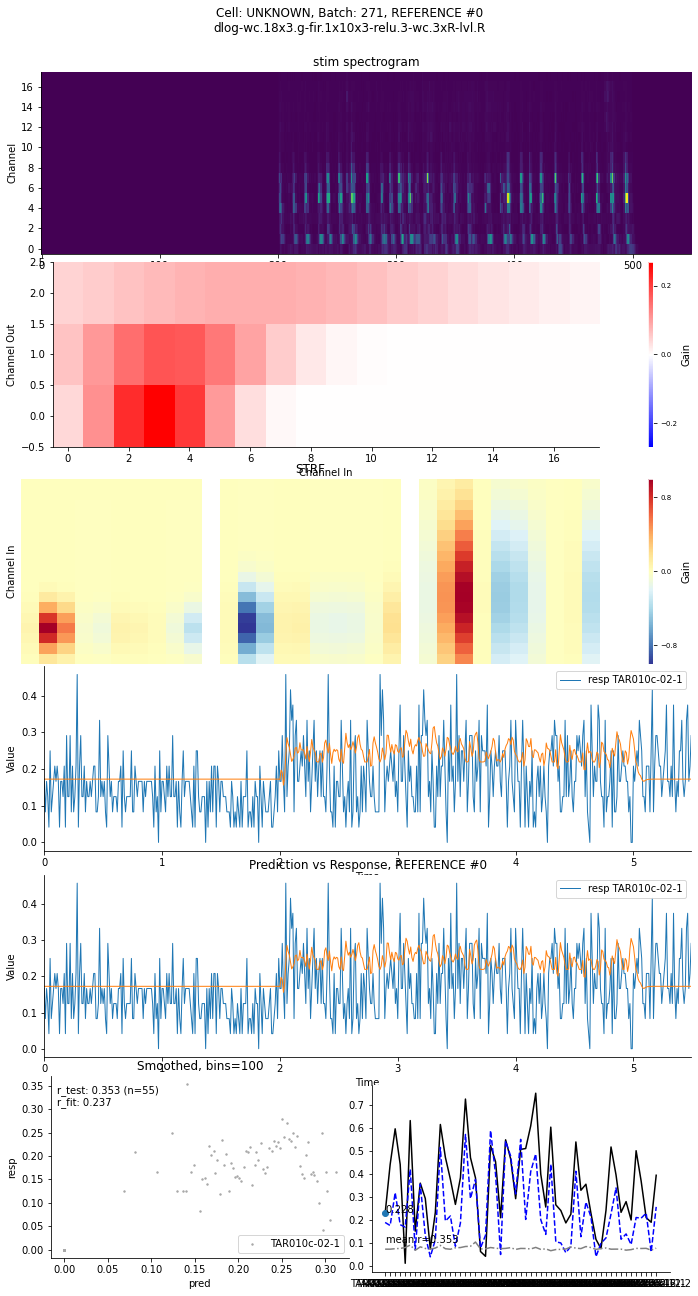

In [11]:
ctx = {}
for xfa in xfspec:
    ctx = xforms.evaluate_step(xfa, ctx)